In [9]:
import os
import random
import pickle
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

In [10]:
class FragmentType:
    CC = 1
    CO = 2
    CN = 3
    CS = 4
    CP = 5
    OO = 6
    NO = 7
    NN = 8
    SO = 9
    PO = 10
    total_fragments= 3

class BondType:
    CC = [1, 2, 3]
    CO = [2]
    CN = [1,2,3]
    CS = [1,2]
    CP = [1]
    OO = [1]
    NO = [1,2]
    NN = [2]
    SO = [1,2]
    PO = [1,2]
    
class AtomType:
  C = 1
  O = 2
  N = 3
  S = 4
  P = 5
  total_types = 2
    
class Valence:
  C = 4
  O = 2
  N = 5
  S = 6
  P = 5

In [3]:
class GraphGenerator:
  def __init__(self):
    super().__init__()

  # Generate all graphs
  def gen(self, saving_folder, num_graphs, **sample_cfg):
    if not os.path.exists(saving_folder):
      os.mkdir(saving_folder)
    labels = {}
    # graphs = {}
    # # graphs_by_type = defaultdict(lambda: []) # For quickly retrieving the same graph type

    for i in tqdm(range(num_graphs)):
      graph, label, settings = self.gen_sample(**sample_cfg)
      
      fname = "%d_%d_%d_%.3f.pkl"%(i, settings[0], setting[1], label)
      saving_path = os.path.join(saving_folder, fname)
      nx.write_gpickle(graph, saving_path)
        
      # graphs_by_type[settings].append(graph)
    
      # graphs[i] = graph
      labels[i] = label

    # pickle.dump(graphs, open("graphs.pkl", "wb"))
    pickle.dump(labels, open("labels.pkl", "wb"))

  def check_iso(self, graph, list_current_graphs):
    
  # Generate one graph
  def gen_sample(self, fragment_types,
                 min_cycle, max_cycle,
                 avg_fragments, std_fragments, 
                 num_nodelb):
    
    cycle_size = np.random.randint(min_cycle, max_cycle+1)
    graph = self.get_cyclic_graph_by_size(cycle_size)
    
    # Choose number of fragments
    num_fragments = int(np.random.normal(avg_fragments, std_fragments))
    # num_fragments = np.random.randint(0, cycle_size+1)
    if num_fragments <= 0:
      num_fragments = 1

    list_fragments = [graph]
    list_fragments_types =[]

    # Random choose all fragments
    for frag_idx in range(num_fragments):
      frag_type = np.random.choice(fragment_types)
      list_fragments_types.append(frag_type)
      list_fragments.append(self.get_graph_by_frag_type(frag_type))

    # Merge all fragments into graph
    graph = self.merge_fragments(list_fragments)

    # Calculate label
    label = self.calculate_label(graph, cycle_size) # np.random.uniform(-2.5e-2, 2.5e-2)
    return graph, label, (cycle_size, num_fragments)

  # Create synthesis label for a graph
  def calculate_label(self, graph, cycle_size):
    cycle_score = 0
    for nid in list(graph.nodes)[:cycle_size]:
        cycle_score += graph.nodes[nid]["label"]
    
    branch_score = 0
    for nid in list(graph)[cycle_size:]:
        branch_score += graph.nodes[nid]["label"]
        
    return cycle_score * 10 + branch_score * 0.1 + np.random.uniform(-1e-2, 1e-2)

  # Create cyclic
  def get_cyclic_graph_by_size(self, size):
    graph = nx.Graph()
    graph.add_nodes_from([
        (i, {"label": AtomType.C}) \
        for i in range(size-1)
    ])
    
    final_node = np.random.randint(1, AtomType.total_types + 1)
    graph.add_nodes_from([
        (size-1, {"label": final_node})
    ])
    
    graph.add_edges_from([
        (i, (i+1)%size, {"label": 1}) \
        for i in range(size)
     ])
    
    return graph

  # Create nx.Graph by fragment type
  def get_graph_by_frag_type(self, frag_type):
    fragment = nx.Graph()
    
    if frag_type == FragmentType.CC:
        fragment.add_nodes_from([
            (0, {"label": AtomType.C}),
            (1, {"label": AtomType.C})
        ])
        bond = random.choice(BondType.CC)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.CO:
        fragment.add_nodes_from([
            (0, {"label": AtomType.C}),
            (1, {"label": AtomType.O})
        ])

        bond = random.choice(BondType.CO)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.CN:
        fragment.add_nodes_from([
            (0, {"label": AtomType.C}),
            (1, {"label": AtomType.N})
        ])

        bond = random.choice(BondType.CN)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.CS:
        fragment.add_nodes_from([
            (0, {"label": AtomType.C}),
            (1, {"label": AtomType.S})
        ])

        bond = random.choice(BondType.CS)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.CP:
        fragment.add_nodes_from([
            (0, {"label": AtomType.C}),
            (1, {"label": AtomType.P})
        ])

        bond = random.choice(BondType.CP)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.OO:
        fragment.add_nodes_from([
            (0, {"label": AtomType.O}),
            (1, {"label": AtomType.O})
        ])

        bond = random.choice(BondType.OO)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.NO:
        fragment.add_nodes_from([
            (0, {"label": AtomType.N}),
            (1, {"label": AtomType.O})
        ])

        bond = random.choice(BondType.NO)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.NN:
        fragment.add_nodes_from([
            (0, {"label": AtomType.N}),
            (1, {"label": AtomType.N})
        ])

        bond = random.choice(BondType.NN)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.SO:
        fragment.add_nodes_from([
            (0, {"label": AtomType.S}),
            (1, {"label": AtomType.O})
        ])

        bond = random.choice(BondType.SO)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    elif frag_type == FragmentType.PO:
        fragment.add_nodes_from([
            (0, {"label": AtomType.P}),
            (1, {"label": AtomType.O})
        ])

        bond = random.choice(BondType.PO)
        fragment.add_edges_from([
            (0, 1, {"label": bond})
        ])
    
    
    return fragment

  def merge_fragments(self, list_fragments):
    graph = list_fragments[0]
    for frag in list_fragments[1:]:
      graph = self.merge_two_fragments(graph, frag)

    return graph

  def merge_two_fragments(self, frag_1, frag_2):
    # Find anchor atoms
    frag_1_atoms = self.find_uncomplete_valence_atom(frag_1) # (nid, current, missing)
    frag_2_atoms = self.find_uncomplete_valence_atom(frag_2)

    possible_merge = []
    for frag_1_atom in frag_1_atoms:
      f1a_nid, f1a_atom_type, f1a_current, f1a_missing = frag_1_atom
      for frag_2_atom in frag_2_atoms:
        f2a_nid, f2a_atom_type, f2a_current, f2a_missing = frag_2_atom

        if f1a_atom_type == f2a_atom_type and f1a_missing >= f2a_current:
          possible_merge.append((f1a_nid, f2a_nid))

    # Re-indexing fragment 2
    if len(possible_merge) == 0:
        return frag_1
    
    nid1, nid2 = random.choice(possible_merge)
    frag_1_num_nodes = frag_1.number_of_nodes()
    
    mapping = {x:x for x in frag_2}
    mapping[0] = nid2
    mapping[nid2] = 0
    frag_2_new = nx.relabel_nodes(frag_2, mapping)

    mapping = {x:x+frag_1_num_nodes-1 for x in frag_2_new}
    mapping[0] = nid1
    nx.relabel_nodes(frag_2_new, mapping, copy=False)

    # Merge fragment 2 to fragment 1
    merged_graph = nx.compose(frag_1, frag_2_new)
    return merged_graph

  def find_uncomplete_valence_atom(self, fragment):
    list_atoms = []

    for nid in fragment:
      node_valence = 0
      for edge in fragment.edges(nid):
        node_valence += fragment.get_edge_data(*edge)["label"]

      valid_valence = self.validate_valence(fragment.nodes[nid]["label"], node_valence)
      if valid_valence > 0:
        list_atoms.append((nid, fragment.nodes[nid]["label"], node_valence, valid_valence))

    return list_atoms
      
  def validate_valence(self, atom_type, valence):
    if atom_type == AtomType.C:
      return Valence.C - valence
    elif atom_type == AtomType.N:
      return Valence.N - valence
    elif atom_type == AtomType.O:
      return Valence.O - valence
    elif atom_type == AtomType.S:
      return Valence.S - valence
    elif atom_type == AtomType.P:
      return Valence.P - valence
    else:
      return 0


In [4]:
# Config
config = {
    "num_graphs": 10,
    "fragment_types": [1, 2, 6],
    "min_cycle": 3,
    "max_cycle": 6,
    "avg_fragments": 3,
    "std_fragments": 0,
    "num_nodelb": -1, # So luong atom type
}

In [5]:
# Run graph generating
!rm -rf data
!rm -rf ready_data
graph_generator = GraphGenerator()
graph_generator.gen(saving_folder="data", **config)

100%|██████████| 10/10 [00:00<00:00, 1222.58it/s]


In [6]:
# Visualize
def get_colors(atom_type):
  if atom_type == AtomType.C:
    return "grey"
  elif atom_type == AtomType.O:
    return "red"
  elif atom_type == AtomType.N:
    return "blue"
  elif atom_type == AtomType.S:
    return "yellow"
  elif atom_type == AtomType.P:
    return "orange"
  else:
    return "black"

def draw_graph(graph):
  nodeLabels = {node:node for node in graph.nodes}

  nodeColors = [get_colors(graph.nodes[node]["label"]) for node in graph.nodes]

  nx.draw(graph, nx.kamada_kawai_layout(graph), edge_color="black", width=1, linewidths=0.1,
              node_size=500, node_color=nodeColors, alpha=0.9,
              labels=nodeLabels)

['8_40.504.pkl', '4_70.103.pkl', '0_50.409.pkl', '6_50.110.pkl', '7_60.397.pkl', '3_40.401.pkl', '5_40.294.pkl', '9_40.203.pkl', '2_40.304.pkl', '1_50.299.pkl']


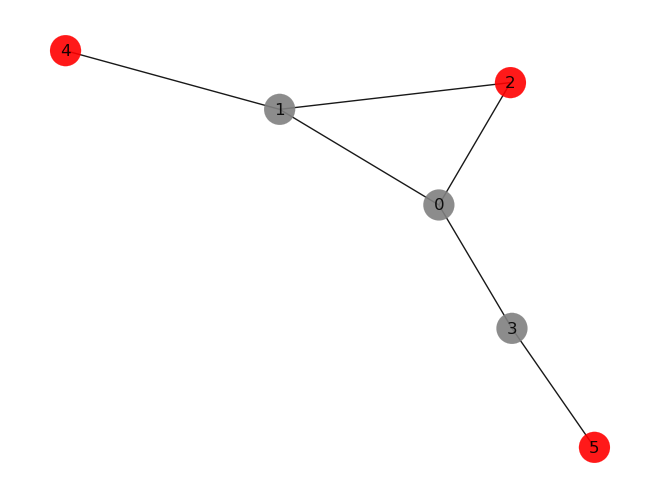

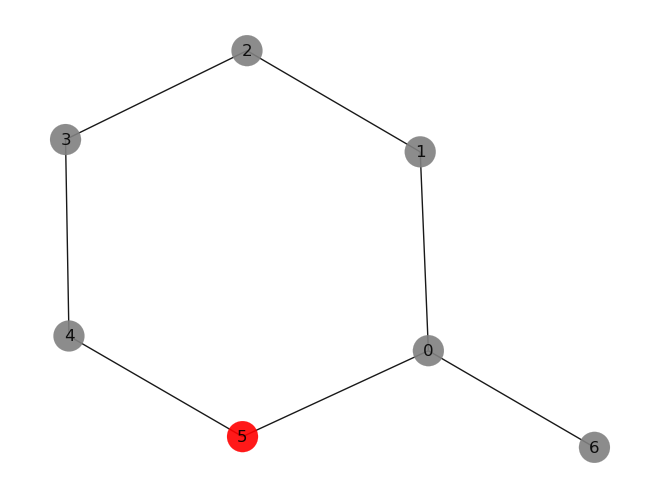

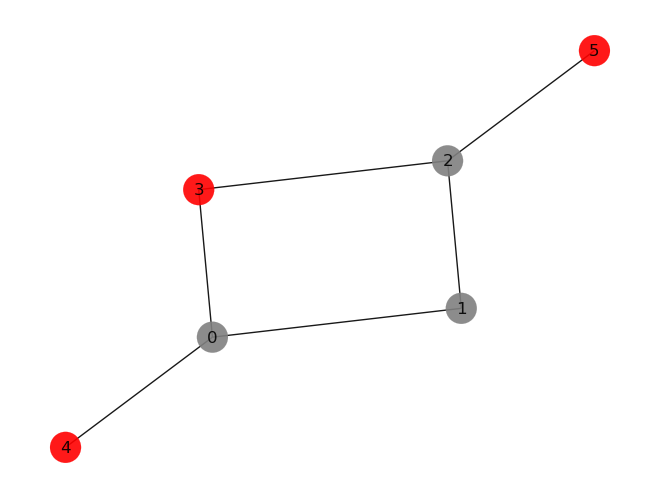

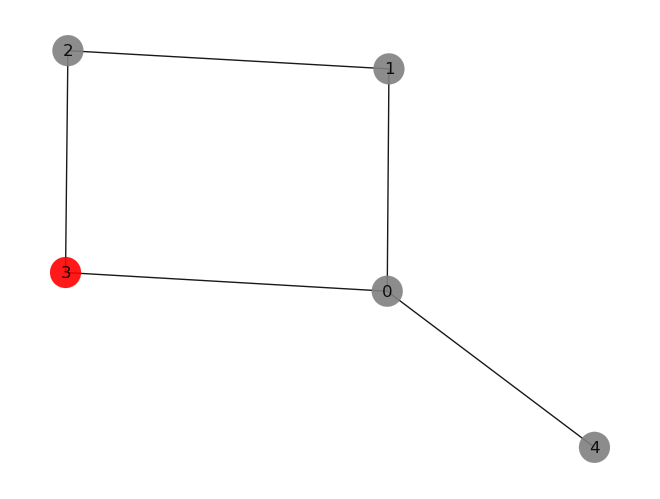

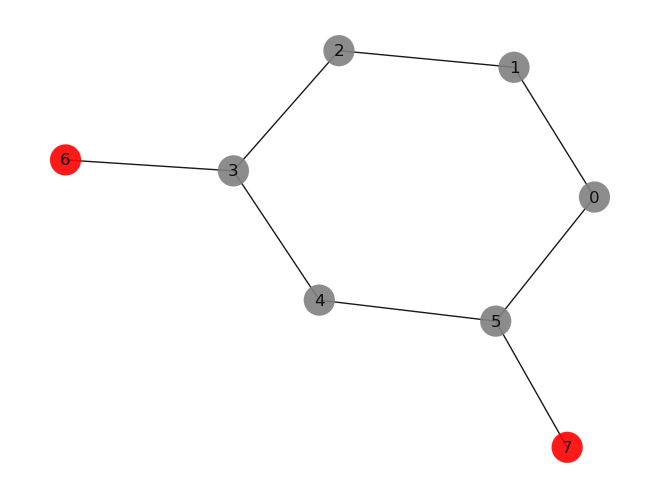

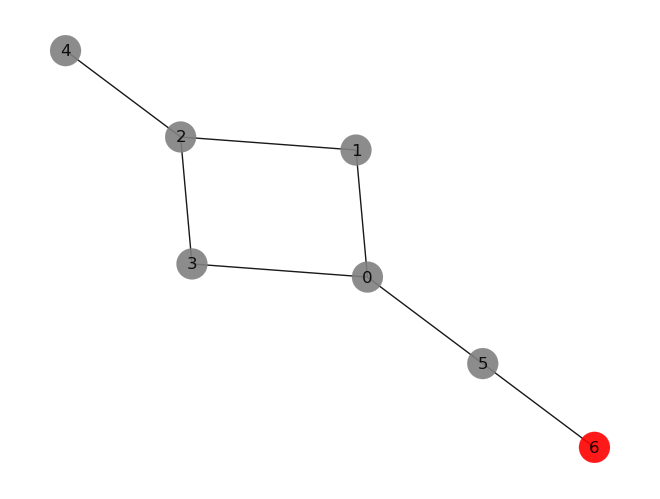

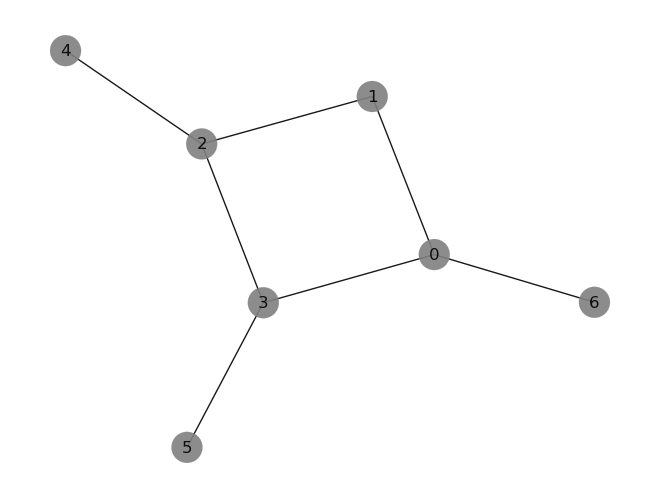

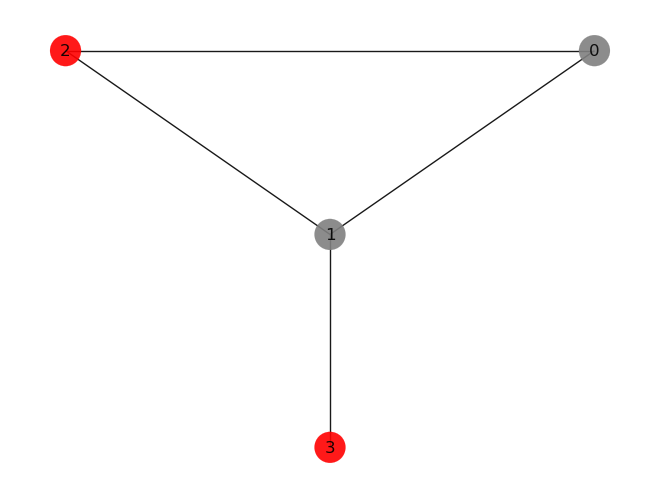

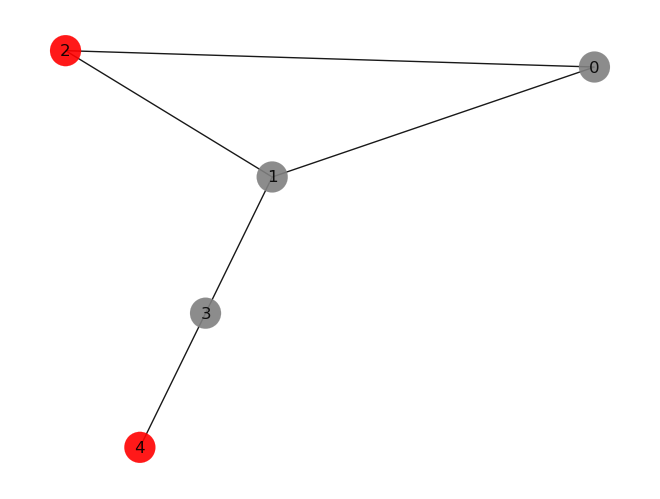

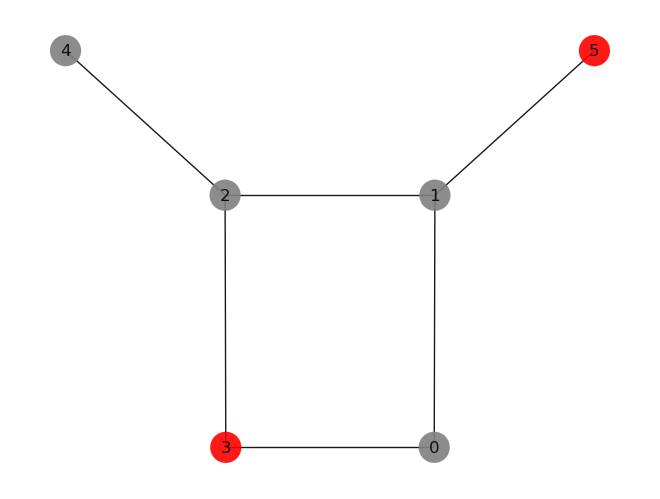

In [8]:
list_graph_files = os.listdir("data")[:10]
graphs = [nx.read_gpickle(os.path.join("data", x)) for x in list_graph_files]

print(list_graph_files)
for graph in graphs:
  draw_graph(graph)
  plt.show()

In [ ]:
# Tổng node trong vòng * 10 + tổng node ở branch * 0.1

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r graph_data.zip data labels.pkl
!cp graph_data.zip "/content/drive/MyDrive/Thesis/Data"

In [ ]:
!cp "/content/drive/MyDrive/Thesis/Data/graph_data.zip" ./graph_data.zip 
!unzip graph_data.zip

Vong 3: 
1-1-(1|2|3) = 3->5
Nhanh: 2
1-1